Original Stock Market Data:
         Date        Open        High         Low       Close   Adj Close  \
0  2014-01-02  398.799988  399.359985  394.019989  397.970001  397.970001   
1  2014-01-03  398.290009  402.709991  396.220001  396.440002  396.440002   
2  2014-01-06  395.850006  397.000000  388.420013  393.630005  393.630005   
3  2014-01-07  395.040009  398.470001  394.290009  398.029999  398.029999   
4  2014-01-08  398.470001  403.000000  396.040009  401.920013  401.920013   

    Volume  
0  2137800  
1  2210200  
2  3170600  
3  1916000  
4  2316500  


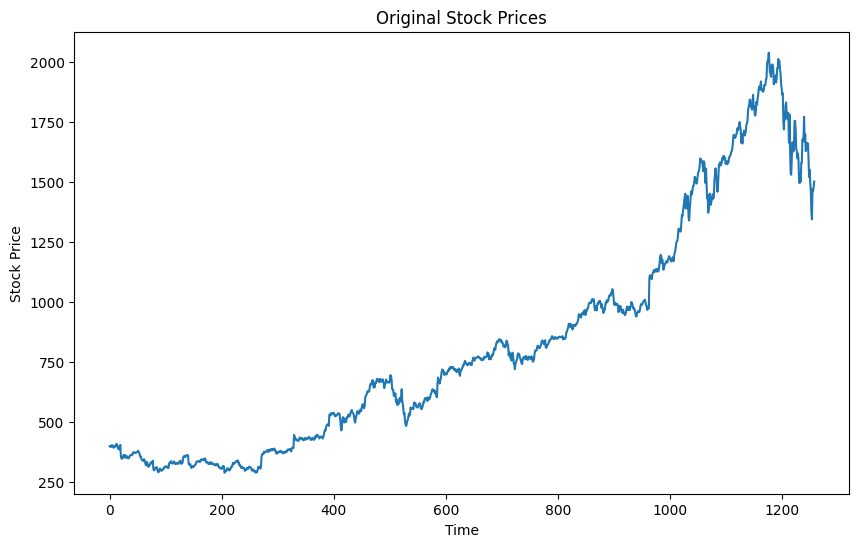

R-squared score: -5.241301493380533
Mean Absolute Error (MAE): 455.0753238050259
Mean Squared Error (MSE): 246469.61009043505
Root Mean Squared Error (RMSE): 496.4570576499392
Mean Absolute Percentage Error (MAPE): 26.6545054886078


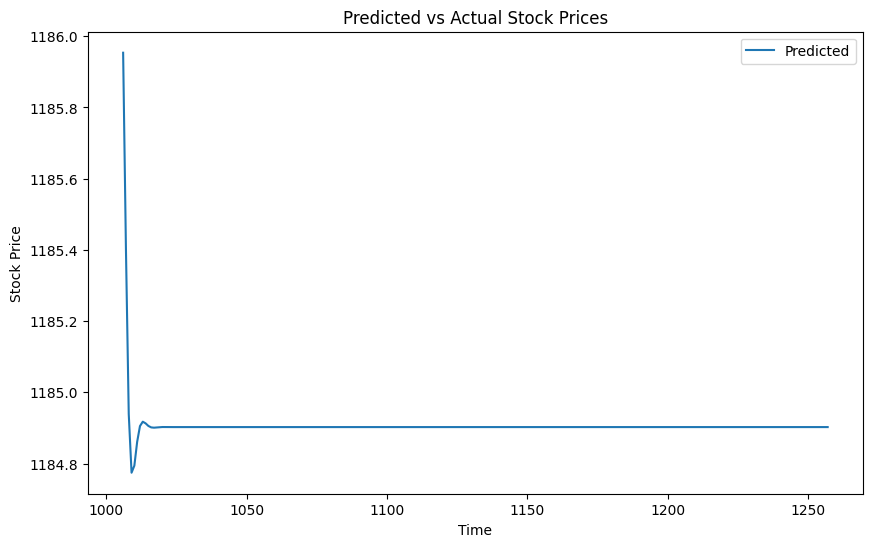

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv("AMZNtrain.csv")
# Display the original stock market data
print("Original Stock Market Data:")
print(data.head())

# Visualize the original stock prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Original Stock Prices')
plt.show()

# Preprocess the data
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]['Close']
test_data = data.iloc[train_size:]['Close']

# Create ARIMA model
model = ARIMA(train_data, order=(3, 1, 2))  # Example order values, you can tune them
model_fit = model.fit()

# Make predictions on the test data
y_pred = model_fit.forecast(steps=len(test_data))
y_pred_series = pd.Series(y_pred, index=test_data.index)

# Calculate the R-squared score
r2 = r2_score(test_data, y_pred_series)
print("R-squared score:", r2)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, y_pred_series)
print("Mean Absolute Error (MAE):", mae)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test_data, y_pred_series)
print("Mean Squared Error (MSE):", mse)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (abs((test_data - y_pred_series) / test_data)).mean() * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Visualize the predicted vs actual stock prices
plt.figure(figsize=(10, 6))

plt.plot(test_data.index, y_pred_series[-len(test_data):].values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.legend()
plt.show()